<a href="https://colab.research.google.com/github/NS011618/dl/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment-1(MLPclassifier)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[[1316    1    2    1    1    5    6    3    4    4]
 [   0 1586    1    3    1    0    2    3    1    3]
 [   4    8 1320   11    4    4    6   11   10    2]
 [   1    1    8 1391    0   10    0    6    1   15]
 [   1    0    3    0 1240    1    2    3    1   44]
 [   1    1    0   13    2 1237   10    2    5    2]
 [   2    0    0    0    5    7 1379    0    3    0]
 [   3    5   10    3    3    1    0 1460    1   17]
 [   6    8    7   13    5   10    6    3 1281   18]
 [   6    1    0    8    8    2    0   10    6 1379]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.99      0.99      1600
           2       0.98      0.96      0.97      1380
           3       0.96      0.97      0.97      1433
           4       0.98      0.96      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.97      0.97   

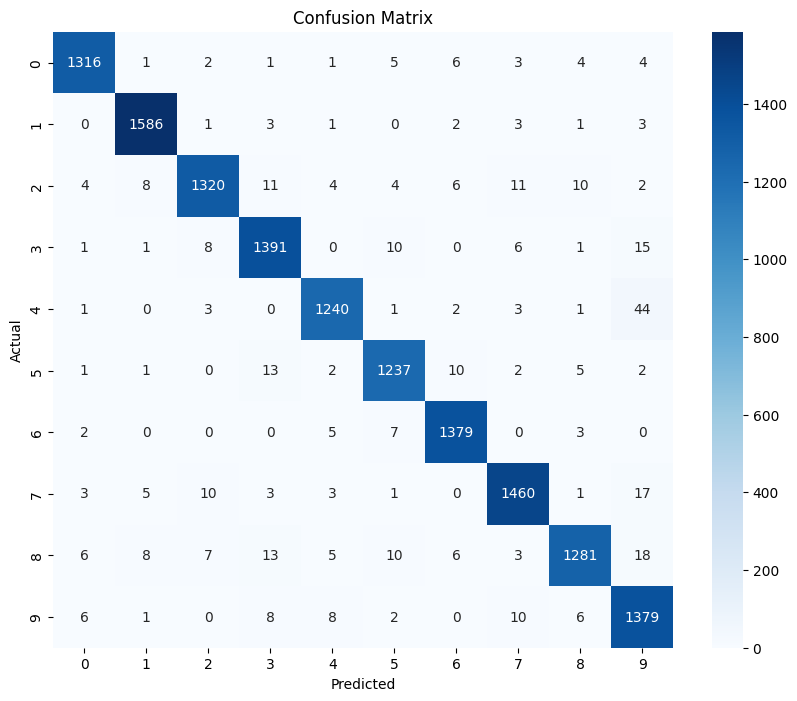

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Normalize pixel values to the range [0, 1]
X /= 255.0

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=10, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions
predictions = mlp.predict(X_test)

# Evaluate the model's performance
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)
print(classification_report(y_test, predictions))

# Plot the confusion matrix heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Experiment-2(tensor,keras,theano,pytorch)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


#import numpy as np
#import theano
#import theano.tensor as T

# Define symbolic variables
#x = T.dscalar('x')
#y = T.dscalar('y')
#z = x + y

# Compile a function
#addition = theano.function([x, y], z)

# Test the function with numeric values
#result = addition(2.5, 3.7)
#print("Result:", result)

# importing torch
import torch
# creating a tensors
t1=torch.tensor([1, 2, 3, 4])
t2=torch.tensor([[1, 2, 3, 4],
[5, 6, 7, 8],
[9, 10, 11, 12]])
# printing the tensors:
print("Tensor t1: \n", t1)
print("\nTensor t2: \n", t2)
# rank of tensors
print("\nRank of t1: ", len(t1.shape))
print("Rank of t2: ", len(t2.shape))
# shape of tensors
print("\nRank of t1: ", t1.shape)
print("Rank of t2: ", t2.shape)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2896 - accuracy: 0.9152
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1422 - accuracy: 0.9582
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1082 - accuracy: 0.9672
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0859 - accuracy: 0.9733
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0814 - accuracy: 0.9751
Test accuracy: 0.9750999808311462
Tensor t1: 
 tensor([1, 2, 3, 4])

Tensor t2: 
 tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])

Rank of t1:  1
Rank of t2:  2

Rank of t1:  torch.Size([4])
Rank of t2:  torch.Size([3, 4])


Experiment-3(hyperparameter tuning)

In [ ]:
pip install scikeras

In [ ]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV
from scikeras.wrappers import KerasClassifier
from sklearn.datasets import load_iris


# Load the Iris dataset from scikit-learn
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define a function to create your neural network model
def create_model(learning_rate=0.01, num_units=64):
    model = keras.Sequential([
        keras.layers.Dense(units=num_units, activation='relu', input_shape=(X_train.shape[1],)),
        keras.layers.Dense(units=num_units, activation='relu'),
        keras.layers.Dense(units=3, activation='softmax')  # Multi-class classification
    ])
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# Create a KerasClassifier with your model function
model = KerasClassifier(learning_rate=0.01,num_units=64,build_fn=create_model, epochs=5, batch_size=10)

# Define the hyperparameters you want to tune
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'num_units': [32, 64, 128]
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)
grid_result = grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding performance
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Accuracy: {grid_result.best_score_}")

# Train your final model with the best hyperparameters
best_model = grid_result.best_estimator_
best_model.fit(X_train, y_train, epochs=30, batch_size=32)


# Evaluate the final model on the test set
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 [==============================] - 2s 5ms/step - loss: 1.1956 - accuracy: 0.3625
Epoch 2/5
8/8 [==============================] - 0s 5ms/step - loss: 0.9689 - accuracy: 0.6375
Epoch 3/5
8/8 [==============================] - 0s 4ms/step - loss: 0.8954 - accuracy: 0.8250
Epoch 4/5
8/8 [==============================] - 0s 6ms/step - loss: 0.8215 - accuracy: 0.9625
Epoch 5/5
4/4 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 [==============================] - 1s 7ms/step - loss: 2.8929 - accuracy: 0.3250
Epoch 2/5
8/8 [==============================] - 0s 7ms/step - loss: 1.8093 - accuracy: 0.3250
Epoch 3/5
8/8 [==============================] - 0s 7ms/step - loss: 1.2134 - accuracy: 0.3375
Epoch 4/5
8/8 [==============================] - 0s 12ms/step - loss: 1.0181 - accuracy: 0.5000
Epoch 5/5
4/4 [==============================] - 0s 4ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 [==============================] - 1s 6ms/step - loss: 1.1487 - accuracy: 0.1250
Epoch 2/5
8/8 [==============================] - 0s 4ms/step - loss: 1.0038 - accuracy: 0.4625
Epoch 3/5
8/8 [==============================] - 0s 4ms/step - loss: 0.9322 - accuracy: 0.4875
Epoch 4/5
8/8 [==============================] - 0s 4ms/step - loss: 0.8718 - accuracy: 0.7375
Epoch 5/5
4/4 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 [==============================] - 1s 4ms/step - loss: 0.9769 - accuracy: 0.4250
Epoch 2/5
8/8 [==============================] - 0s 4ms/step - loss: 0.8206 - accuracy: 0.5375
Epoch 3/5
8/8 [==============================] - 0s 4ms/step - loss: 0.7172 - accuracy: 0.8375
Epoch 4/5
8/8 [==============================] - 0s 4ms/step - loss: 0.6556 - accuracy: 0.9750
Epoch 5/5
4/4 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 [==============================] - 1s 6ms/step - loss: 1.4724 - accuracy: 0.0750
Epoch 2/5
8/8 [==============================] - 0s 5ms/step - loss: 1.1032 - accuracy: 0.3125
Epoch 3/5
8/8 [==============================] - 0s 7ms/step - loss: 0.9106 - accuracy: 0.5375
Epoch 4/5
8/8 [==============================] - 0s 7ms/step - loss: 0.7550 - accuracy: 0.8500
Epoch 5/5
4/4 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 [==============================] - 2s 6ms/step - loss: 1.2155 - accuracy: 0.4000
Epoch 2/5
8/8 [==============================] - 0s 9ms/step - loss: 0.9329 - accuracy: 0.5000
Epoch 3/5
8/8 [==============================] - 0s 9ms/step - loss: 0.8915 - accuracy: 0.4500
Epoch 4/5
8/8 [==============================] - 0s 7ms/step - loss: 0.8315 - accuracy: 0.7625
Epoch 5/5
4/4 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 [==============================] - 5s 11ms/step - loss: 1.0531 - accuracy: 0.4500
Epoch 2/5
8/8 [==============================] - 0s 13ms/step - loss: 0.8432 - accuracy: 0.7125
Epoch 3/5
8/8 [==============================] - 0s 10ms/step - loss: 0.6820 - accuracy: 0.6625
Epoch 4/5
8/8 [==============================] - 0s 13ms/step - loss: 0.5278 - accuracy: 0.8125
Epoch 5/5
4/4 [==============================] - 0s 21ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
8/8 [==============================] - 4s 7ms/step - loss: 1.0241 - accuracy: 0.4500
Epoch 2/5
8/8 [==============================] - 0s 7ms/step - loss: 0.7830 - accuracy: 0.7875
Epoch 3/5
8/8 [==============================] - 0s 9ms/step - loss: 0.6271 - accuracy: 0.6750
Epoch 4/5
8/8 [==============================] - 0s 7ms/step - loss: 0.5093 - accuracy: 0.8750
Epoch 5/5
4/4 [==============================] - 0s 6ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
8/8 [==============================] - 4s 14ms/step - loss: 0.9772 - accuracy: 0.5500
Epoch 2/5
8/8 [==============================] - 0s 11ms/step - loss: 0.8320 - accuracy: 0.6250
Epoch 3/5
8/8 [==============================] - 0s 13ms/step - loss: 0.6523 - accuracy: 0.6625
Epoch 4/5
8/8 [==============================] - 0s 12ms/step - loss: 0.5467 - accuracy: 0.8000
Epoch 5/5
4/4 [==============================] - 2s 10ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
8/8 [==============================] - 6s 12ms/step - loss: 0.9532 - accuracy: 0.5000
Epoch 2/5
8/8 [==============================] - 0s 7ms/step - loss: 0.5879 - accuracy: 0.6875
Epoch 3/5
8/8 [==============================] - 0s 10ms/step - loss: 0.4552 - accuracy: 0.7875
Epoch 4/5
8/8 [==============================] - 0s 6ms/step - loss: 0.4434 - accuracy: 0.7375
Epoch 5/5
4/4 [==============================] - 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
8/8 [==============================] - 3s 6ms/step - loss: 1.0483 - accuracy: 0.3625
Epoch 2/5
8/8 [==============================] - 0s 8ms/step - loss: 0.7624 - accuracy: 0.6750
Epoch 3/5
8/8 [==============================] - 0s 8ms/step - loss: 0.5505 - accuracy: 0.6250
Epoch 4/5
8/8 [==============================] - 0s 10ms/step - loss: 0.4445 - accuracy: 0.8250
Epoch 5/5
4/4 [==============================] - 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
8/8 [==============================] - 3s 10ms/step - loss: 1.1819 - accuracy: 0.4375
Epoch 2/5
8/8 [==============================] - 0s 5ms/step - loss: 0.7331 - accuracy: 0.6125
Epoch 3/5
8/8 [==============================] - 0s 5ms/step - loss: 0.5116 - accuracy: 0.7750
Epoch 4/5
8/8 [==============================] - 0s 6ms/step - loss: 0.4091 - accuracy: 0.8250
Epoch 5/5
4/4 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
8/8 [==============================] - 6s 11ms/step - loss: 0.8736 - accuracy: 0.6125
Epoch 2/5
8/8 [==============================] - 0s 9ms/step - loss: 0.4338 - accuracy: 0.8000
Epoch 3/5
8/8 [==============================] - 0s 10ms/step - loss: 0.3307 - accuracy: 0.8375
Epoch 4/5
8/8 [==============================] - 0s 12ms/step - loss: 0.2367 - accuracy: 0.9125
Epoch 5/5
4/4 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
8/8 [==============================] - 3s 9ms/step - loss: 1.0573 - accuracy: 0.5375
Epoch 2/5
8/8 [==============================] - 0s 12ms/step - loss: 0.4870 - accuracy: 0.9125
Epoch 3/5
8/8 [==============================] - 0s 9ms/step - loss: 0.3165 - accuracy: 0.9125
Epoch 4/5
8/8 [==============================] - 0s 7ms/step - loss: 0.2205 - accuracy: 0.9500
Epoch 5/5
4/4 [==============================] - 0s 8ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
8/8 [==============================] - 3s 7ms/step - loss: 1.0416 - accuracy: 0.3750
Epoch 2/5
8/8 [==============================] - 0s 7ms/step - loss: 0.6010 - accuracy: 0.6875
Epoch 3/5
8/8 [==============================] - 0s 6ms/step - loss: 0.4392 - accuracy: 0.7625
Epoch 4/5
8/8 [==============================] - 0s 8ms/step - loss: 0.3012 - accuracy: 0.9000
Epoch 5/5
4/4 [==============================] - 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
8/8 [==============================] - 5s 9ms/step - loss: 0.8977 - accuracy: 0.5625
Epoch 2/5
8/8 [==============================] - 0s 8ms/step - loss: 0.4695 - accuracy: 0.7750
Epoch 3/5
8/8 [==============================] - 0s 11ms/step - loss: 0.3218 - accuracy: 0.9250
Epoch 4/5
8/8 [==============================] - 0s 12ms/step - loss: 0.2285 - accuracy: 0.8875
Epoch 5/5
4/4 [==============================] - 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
8/8 [==============================] - 3s 7ms/step - loss: 0.9915 - accuracy: 0.4500
Epoch 2/5
8/8 [==============================] - 0s 8ms/step - loss: 0.4178 - accuracy: 0.8500
Epoch 3/5
8/8 [==============================] - 0s 6ms/step - loss: 0.2381 - accuracy: 0.9125
Epoch 4/5
8/8 [==============================] - 0s 6ms/step - loss: 0.1341 - accuracy: 0.9750
Epoch 5/5
4/4 [==============================] - 0s 5ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
8/8 [==============================] - 3s 9ms/step - loss: 1.1438 - accuracy: 0.6625
Epoch 2/5
8/8 [==============================] - 0s 6ms/step - loss: 0.6316 - accuracy: 0.6625
Epoch 3/5
8/8 [==============================] - 0s 7ms/step - loss: 0.4944 - accuracy: 0.7500
Epoch 4/5
8/8 [==============================] - 0s 11ms/step - loss: 0.4043 - accuracy: 0.7500
Epoch 5/5
4/4 [==============================] - 0s 19ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
8/8 [==============================] - 5s 6ms/step - loss: 1.1391 - accuracy: 0.5375
Epoch 2/5
8/8 [==============================] - 0s 6ms/step - loss: 0.5844 - accuracy: 0.6625
Epoch 3/5
8/8 [==============================] - 0s 8ms/step - loss: 0.4733 - accuracy: 0.7250
Epoch 4/5
8/8 [==============================] - 0s 10ms/step - loss: 0.3617 - accuracy: 0.8250
Epoch 5/5
4/4 [==============================] - 0s 4ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 [==============================] - 1s 4ms/step - loss: 1.9497 - accuracy: 0.2125
Epoch 2/5
8/8 [==============================] - 0s 4ms/step - loss: 0.8211 - accuracy: 0.5375
Epoch 3/5
8/8 [==============================] - 0s 4ms/step - loss: 0.4500 - accuracy: 0.7500
Epoch 4/5
8/8 [==============================] - 0s 4ms/step - loss: 0.3465 - accuracy: 0.8000
Epoch 5/5
4/4 [==============================] - 0s 2ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 [==============================] - 1s 4ms/step - loss: 1.2260 - accuracy: 0.5875
Epoch 2/5
8/8 [==============================] - 0s 4ms/step - loss: 0.4542 - accuracy: 0.7000
Epoch 3/5
8/8 [==============================] - 0s 4ms/step - loss: 0.2840 - accuracy: 0.8750
Epoch 4/5
8/8 [==============================] - 0s 4ms/step - loss: 0.1549 - accuracy: 0.9250
Epoch 5/5
4/4 [==============================] - 0s 4ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 [==============================] - 1s 5ms/step - loss: 3.0081 - accuracy: 0.4000
Epoch 2/5
8/8 [==============================] - 0s 4ms/step - loss: 0.8925 - accuracy: 0.5625
Epoch 3/5
8/8 [==============================] - 0s 4ms/step - loss: 0.5194 - accuracy: 0.6750
Epoch 4/5
8/8 [==============================] - 0s 4ms/step - loss: 0.4880 - accuracy: 0.6875
Epoch 5/5
4/4 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 [==============================] - 1s 4ms/step - loss: 4.3981 - accuracy: 0.3125
Epoch 2/5
8/8 [==============================] - 0s 3ms/step - loss: 0.9265 - accuracy: 0.6250
Epoch 3/5
8/8 [==============================] - 0s 4ms/step - loss: 0.5469 - accuracy: 0.6375
Epoch 4/5
8/8 [==============================] - 0s 5ms/step - loss: 0.3823 - accuracy: 0.7375
Epoch 5/5
4/4 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 [==============================] - 1s 4ms/step - loss: 3.2217 - accuracy: 0.4750
Epoch 2/5
8/8 [==============================] - 0s 4ms/step - loss: 0.5441 - accuracy: 0.7125
Epoch 3/5
8/8 [==============================] - 0s 4ms/step - loss: 0.3911 - accuracy: 0.8000
Epoch 4/5
8/8 [==============================] - 0s 4ms/step - loss: 0.2916 - accuracy: 0.8500
Epoch 5/5
4/4 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 [==============================] - 1s 4ms/step - loss: 9.0942 - accuracy: 0.3750
Epoch 2/5
8/8 [==============================] - 0s 4ms/step - loss: 0.9151 - accuracy: 0.5250
Epoch 3/5
8/8 [==============================] - 0s 4ms/step - loss: 0.6617 - accuracy: 0.6000
Epoch 4/5
8/8 [==============================] - 0s 4ms/step - loss: 0.4723 - accuracy: 0.6625
Epoch 5/5
4/4 [==============================] - 0s 4ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 [==============================] - 1s 4ms/step - loss: 8.8677 - accuracy: 0.2625
Epoch 2/5
8/8 [==============================] - 0s 4ms/step - loss: 1.2254 - accuracy: 0.2625
Epoch 3/5
8/8 [==============================] - 0s 4ms/step - loss: 1.1180 - accuracy: 0.2375
Epoch 4/5
8/8 [==============================] - 0s 5ms/step - loss: 1.1348 - accuracy: 0.2875
Epoch 5/5
4/4 [==============================] - 0s 3ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


8/8 [==============================] - 1s 5ms/step - loss: 5.7007 - accuracy: 0.4750
Epoch 2/5
8/8 [==============================] - 0s 5ms/step - loss: 0.7814 - accuracy: 0.6750
Epoch 3/5
8/8 [==============================] - 0s 4ms/step - loss: 0.4588 - accuracy: 0.7125
Epoch 4/5
8/8 [==============================] - 0s 4ms/step - loss: 0.5480 - accuracy: 0.7750
Epoch 5/5
4/4 [==============================] - 0s 4ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


12/12 [==============================] - 1s 5ms/step - loss: 0.8966 - accuracy: 0.6667
Epoch 2/5
12/12 [==============================] - 0s 4ms/step - loss: 0.4302 - accuracy: 0.7083
Epoch 3/5
12/12 [==============================] - 0s 4ms/step - loss: 0.2695 - accuracy: 0.9083
Epoch 4/5
12/12 [==============================] - 0s 4ms/step - loss: 0.1833 - accuracy: 0.9250
Epoch 5/5
12/12 [==============================] - 0s 4ms/step - loss: 0.1746 - accuracy: 0.9333
Best Parameters: {'learning_rate': 0.01, 'num_units': 128}
Best Accuracy: 0.9666666666666667
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


4/4 [==============================] - 1s 7ms/step - loss: 1.5195 - accuracy: 0.2833
Epoch 2/30
4/4 [==============================] - 0s 6ms/step - loss: 0.8409 - accuracy: 0.6167
Epoch 3/30
4/4 [==============================] - 0s 5ms/step - loss: 0.5804 - accuracy: 0.6750
Epoch 4/30
4/4 [==============================] - 0s 6ms/step - loss: 0.4765 - accuracy: 0.6583
Epoch 5/30
4/4 [==============================] - 0s 6ms/step - loss: 0.4121 - accuracy: 0.7750
Epoch 6/30
4/4 [==============================] - 0s 6ms/step - loss: 0.3689 - accuracy: 0.8750
Epoch 7/30
4/4 [==============================] - 0s 5ms/step - loss: 0.3103 - accuracy: 0.9333
Epoch 8/30
4/4 [==============================] - 0s 5ms/step - loss: 0.2670 - accuracy: 0.9583
Epoch 9/30
4/4 [==============================] - 0s 5ms/step - loss: 0.2221 - accuracy: 0.9667
Epoch 10/30
4/4 [==============================] - 0s 5ms/step - loss: 0.1596 - accuracy: 0.9833
Epoch 11/30
4/4 [==============================] -

Experiment-4(optimization techniques)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7116 - accuracy: 0.8036 - val_loss: 0.3650 - val_accuracy: 0.9030
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3865 - accuracy: 0.8892 - val_loss: 0.2934 - val_accuracy: 0.9200
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3224 - accuracy: 0.9079 - val_loss: 0.2555 - val_accuracy: 0.9291
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2852 - accuracy: 0.9186 - val_loss: 0.2301 - val_accuracy: 0.9347
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2593 - accuracy: 0.9265 - val_loss: 0.2090 - val_accuracy: 0.9412
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3434 - accuracy: 0.8998 - val_loss: 0.1624 - val_accuracy: 0.9533
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1723 - accuracy: 0.9500 - val_loss: 0.1152 - val_accuracy: 0.

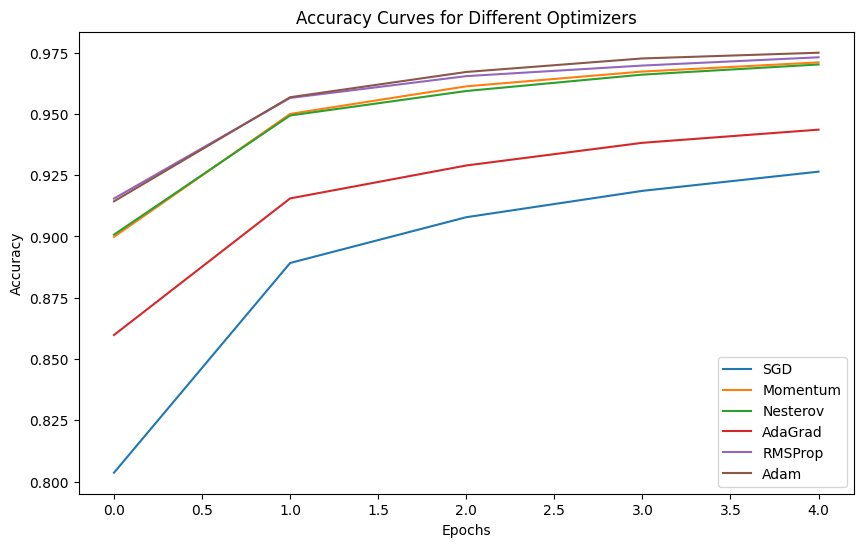

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define a function to create and compile a model
def create_model(optimizer):
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define different optimizers
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01),
    'Momentum': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Nesterov': tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    'AdaGrad': tf.keras.optimizers.Adagrad(learning_rate=0.01),
    'RMSProp': tf.keras.optimizers.RMSprop(learning_rate=0.001),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.001)
}

# Initialize a dictionary to store accuracy history for each optimizer
accuracy_history = {}

# Train and evaluate models with different optimizers
num_epochs = 5

for optimizer_name, optimizer in optimizers.items():
    model = create_model(optimizer)
    history = model.fit(X_train, y_train, epochs=num_epochs, verbose=1, validation_data=(X_test, y_test))
    accuracy_history[optimizer_name] = history.history['accuracy']

# Plot accuracy curves for each optimizer
plt.figure(figsize=(10, 6))
for optimizer_name, accuracy_values in accuracy_history.items():
    plt.plot(accuracy_values, label=optimizer_name)

plt.title('Accuracy Curves for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Experiment-5(denoising and noising autoencoder)

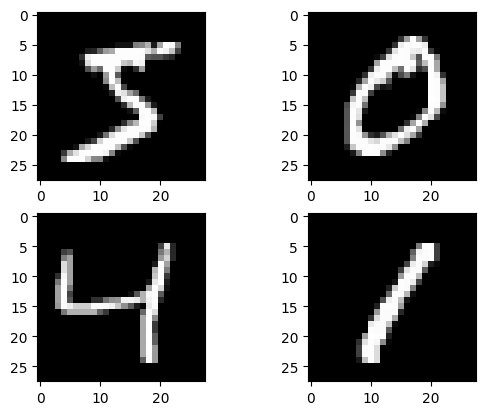

Epoch 1/2
300/300 [==============================] - 9s 13ms/step - loss: 0.0423 - val_loss: 0.0204
Epoch 2/2
313/313 [==============================] - 1s 4ms/step
Test Images


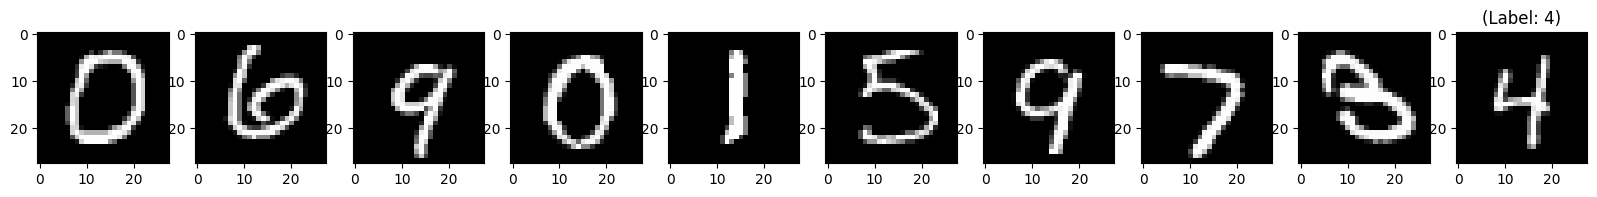

Test Images with Noise


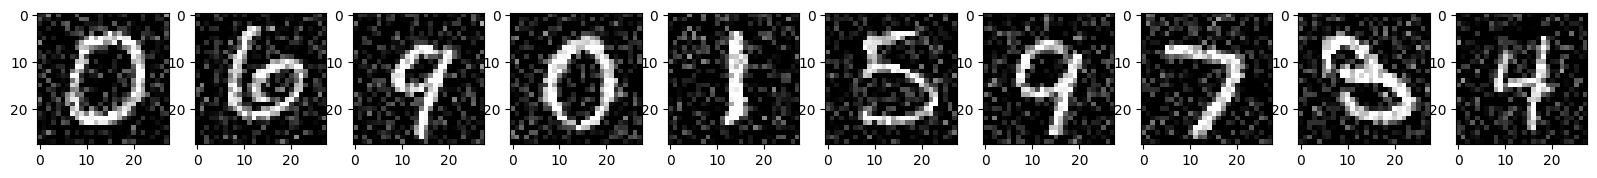

Reconstruction of Noisy Test Images


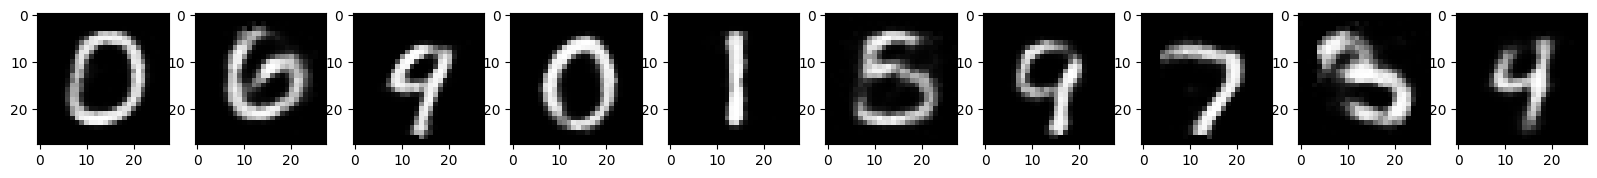

In [ ]:
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape
X_test.shape
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255
X_train.shape
X_test.shape
noise_factor = 0.2
x_train_noisy = X_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0
, size=X_train.shape)
x_test_noisy = X_test + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Training model
model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=2
, batch_size=200)


# Final evaluation of the model
pred = model.predict(x_test_noisy)
pred.shape


X_test.shape


X_test = numpy.reshape(X_test, (10000,28,28)) *255
pred = numpy.reshape(pred, (10000,28,28)) *255
x_test_noisy = numpy.reshape(x_test_noisy, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
  plt.subplot(2, 10, i+1)
  plt.imshow(X_test[i,:,:], cmap='gray')
  curr_lbl = y_test[i]
plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
  plt.subplot(2, 10, i+1)
  plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")



for i in range(10,20,1):
  plt.subplot(2, 10, i+1)
  plt.imshow(pred[i,:,:], cmap='gray')
plt.show()

Experiment-6(various regularization techniques)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4706 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3035 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2830 - accuracy: 0.9216
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2729 - accuracy: 0.9236
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2944 - accuracy: 0.9224
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1536 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1230 - accuracy: 0.9712
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1072 - accuracy: 0.9772
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1243 - accuracy: 0.9719
Epoch 1/5
1875/1875 [=======

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0869 - accuracy: 0.9730
Epoch 2/5
1858/1875 [============================>.] - ETA: 0s - loss: 0.0796 - accuracy: 0.9753

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0795 - accuracy: 0.9754
Epoch 3/5
1869/1875 [============================>.] - ETA: 0s - loss: 0.0745 - accuracy: 0.9760

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0747 - accuracy: 0.9760
Epoch 4/5
1861/1875 [============================>.] - ETA: 0s - loss: 0.0677 - accuracy: 0.9778

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0675 - accuracy: 0.9779
Epoch 5/5
1865/1875 [============================>.] - ETA: 0s - loss: 0.0633 - accuracy: 0.9798

313/313 [==============================] - 1s 3ms/step - loss: 0.0746 - accuracy: 0.9781


[0.07458924502134323, 0.9781000018119812]

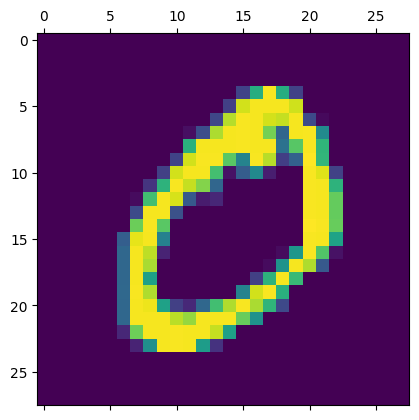

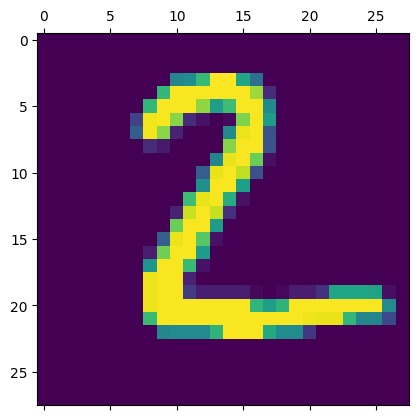

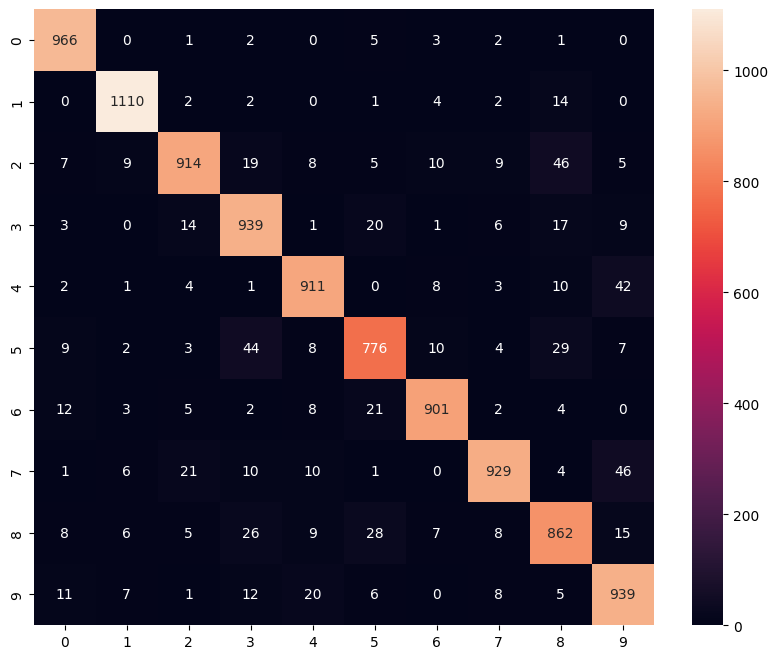

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

X_train
y_train[:5]
X_train.shape
X_train[0].shape
plt.matshow(X_train[1])
X_train = X_train / 255
X_test = X_test / 255

X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)

X_train_flat.shape
model=keras.Sequential([ keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_flat,y_train,epochs=5)
model.evaluate(X_test_flat,y_test)
y_pred=model.predict(X_test_flat)
y_pred[0]
plt.matshow(X_test[1])
np.argmax(y_pred[1])
y_pred_labels=[np.argmax(i) for i in y_pred]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='d')

from keras import regularizers
model1=keras.Sequential([
keras.layers.Dense(100,input_shape=(784,),activation='relu',kernel_regularizer=regularizers.l2 (0.0001)),
keras.layers.Dense(10,activation='sigmoid')])

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train_flat,y_train,epochs=5)
model1.evaluate(X_test_flat,y_test)
model2=keras.Sequential([ keras.layers.Dense(100,input_shape=(784,),activation='relu',kernel_regularizer=regularizers.l1
(0.0001)),
keras.layers.Dense(10,activation='sigmoid')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
)
model2.fit(X_train_flat,y_train,epochs=5)
model2.evaluate(X_test_flat,y_test)

from keras.layers import Dropout
model3=keras.Sequential([
keras.layers.Dense(100,input_shape=(784,),activation='relu'), Dropout(0.25), keras.layers.Dense(10,activation='sigmoid')
])

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']
)
model3.fit(X_train_flat,y_train,epochs=5)
model3.evaluate(X_test_flat,y_test)
from keras.callbacks import EarlyStopping
model3.fit(X_train_flat,y_train,epochs=5,callbacks = [EarlyStopping(monitor='val_acc', patience
=2)])


model3.evaluate(X_test_flat,y_test)

Experiment-7

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

(train_ds, train_labels), (test_ds, test_labels) = tfds.load(
"tf_flowers",split=["train[:70%]", "train[:30%]"],
batch_size=-1,
as_supervised=True,
)

train_ds = tf.image.resize(train_ds, (150, 150))
test_ds = tf.image.resize(test_ds, (150, 150))

train_labels = to_categorical(train_labels, num_classes=5)
test_labels = to_categorical(test_labels, num_classes=5)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout

model = Sequential()
model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4),
activation='relu', input_shape=train_ds[0].shape))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1),
activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1),
activation='relu', padding="same"))
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1),
activation='relu', padding="same"))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1),
activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

train_ds = train_ds / 255.0
test_ds = test_ds / 255.0
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)
history_alex = model.fit(train_ds, train_labels, epochs=50, validation_split=0.2, batch_size=32,)

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models

base_model = VGG16(weights="imagenet", include_top=False,
input_shape=train_ds[0].shape)
base_model.trainable = False

train_ds = preprocess_input(train_ds)
test_ds = preprocess_input(test_ds)

base_model.summary()

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(5, activation='softmax')
model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

model.compile(
optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'],
)
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)
history = model.fit(train_ds, train_labels, epochs=50, validation_split=0.2, batch_size=32,)

import matplotlib.pyplot as plt
plt.title("Model comparison over tf_flower dataset (Loss vs Epochs)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history.history["val_loss"], label = "VGG16 Accuracy")
plt.plot(history_alex.history["val_loss"], label = "Trained AlexNet Accuracy")
plt.legend()
plt.show()
plt.title("Model comparison over tf_flower dataset (Accuracy vs Epochs)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history["val_accuracy"], label = "VGG16 Accuracy")
plt.plot(history_alex.history["val_accuracy"], label = "Trained AlexNet Accuracy")
plt.legend()
plt.show()

Experiment-8

In [ ]:
import tensorflow as tf
import numpy as n
import matplotlib.pyplot as plt

def prep_input(path):
    image = tf.image.decode_png(tf.io.read_file(path))
    image = tf.expand_dims(image, axis=0)
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [224,224])
    return image

def norm_flat_image(img):
    grads_norm = img[:,:,0]+ img[:,:,1]+ img[:,:,2]
    grads_norm = (grads_norm - tf.reduce_min(grads_norm))/ (tf.reduce_max(grads_norm)- tf.reduce_min(grads_norm))
    return grads_norm

def get_lion():
    import urllib.request
    filename = 'lion.jpg'
    img_url = r"https://upload.wikimedia.org/wikipedia/commons/7/73/Lion_waiting_in_Namibia.jpg"
    urllib.request.urlretrieve(img_url, filename)

def plot_maps(img1, img2,vmin=0.3,vmax=0.7, mix_val=2):
    f = plt.figure(figsize=(15,45))
    plt.subplot(1,3,1)
    plt.imshow(img1,vmin=vmin, vmax=vmax, cmap="gray")
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(img2, cmap = "gray")
    plt.axis("off")
    plt.subplot(1,3,3)
    plt.imshow(img1*mix_val+img2/mix_val, cmap = "gray" )
    plt.axis("off")

test_model = tf.keras.applications.densenet.DenseNet201()
get_lion()
img_path = "lion.jpg"
input_img = prep_input(img_path)
input_img = tf.keras.applications.densenet.preprocess_input(input_img)
plt.imshow(norm_flat_image(input_img[0]), cmap = "gray")
result = test_model(input_img)
max_idx = tf.argmax(result,axis = 1)
tf.keras.applications.imagenet_utils.decode_predictions(result.numpy())

@tf.custom_gradient
def guidedRelu(x):
    def grad(dy):
        return tf.cast(dy>0,tf.float32) * tf.cast(x>0,tf.float32) * dy
    return tf.nn.relu(x), grad

count_changes = 0
layer_dict = [layer for layer in test_model.layers[1:] if hasattr(layer,'activation')]
for layer in layer_dict:
    if layer.activation == tf.keras.activations.relu:
        layer.activation = guidedRelu
        count_changes += 1
print(f"Updated {count_changes} layers!")

with tf.GradientTape() as tape:
    tape.watch(input_img)
    result = test_model(input_img)
    max_score = result[0,max_idx[0]]
grads = tape.gradient(max_score, input_img)

plot_maps(norm_flat_image(grads[0]), norm_flat_image(input_img[0]))

Experiment-9

In [ ]:
import tensorflow as tf

import numpy as np
import os
import time

path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')


text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
vocab = sorted(set(text))

ids_from_chars = tf.keras.layers.StringLookup(
    vocabulary=list(vocab), mask_token=None)

chars_from_ids = tf.keras.layers.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)

def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
all_ids

ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)
seq_length = 100
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)
BATCH_SIZE = 64
BUFFER_SIZE = 10000

dataset = (dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).prefetch(tf.data.experimental.AUTOTUNE))
dataset

vocab_size = len(ids_from_chars.get_vocabulary())
embedding_dim = 256
rnn_units = 1024

class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x

model = MyModel(vocab_size=vocab_size, embedding_dim=embedding_dim, rnn_units=rnn_units)

loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss)

EPOCHS = 20
history = model.fit(dataset, epochs=EPOCHS)


class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(values=[-float('inf')]*len(skip_ids), indices=skip_ids, dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()
    predicted_logits, states = self.model(inputs=input_ids, states=states, return_state=True)

    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    predicted_logits = predicted_logits + self.prediction_mask
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)
    predicted_chars = self.chars_from_ids(predicted_ids)
    return predicted_chars, states

one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

start = time.time()
states = None
next_char = tf.constant(['ROMEO:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)

Experiment-10

In [ ]:
import string
import numpy as np
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Model
from keras.layers import LSTM, Input, TimeDistributed, Dense,Activation, RepeatVector, Embedding
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

import pathlib

path_to_zip = tf.keras.utils.get_file(
    'spa-eng.zip', origin='http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip',
    extract=True)

path_to_data = pathlib.Path(path_to_zip).parent/'spa-eng/spa.txt'

translation_file = open(path_to_data,"r", encoding='utf-8')
raw_data = translation_file.read()
translation_file.close()

raw_data = raw_data.split('\n')
pairs = [sentence.split('\t') for sentence in raw_data]
pairs = pairs[1000:20000]

def clean_sentence(sentence):
  # Lower case the sentence
  lower_case_sent = sentence.lower() # Strip punctuation
  string_punctuation = string.punctuation + "¡" + '¿'
  clean_sentence = lower_case_sent.translate(str.maketrans('', '', string_punctuation))
  return clean_sentence

def tokenize(sentences): # Create tokenizer
  text_tokenizer = Tokenizer() # Fit texts
  text_tokenizer.fit_on_texts(sentences)
  return text_tokenizer.texts_to_sequences(sentences), text_tokenizer

english_sentences = [clean_sentence(pair[0]) for pair in pairs]
spanish_sentences = [clean_sentence(pair[1]) for pair in pairs]

# Tokenize words
spa_text_tokenized, spa_text_tokenizer = tokenize(spanish_sentences)
eng_text_tokenized, eng_text_tokenizer = tokenize(english_sentences)

print('Maximum length spanish sentence: {}'.format(len(max(spa_text_tokenized,key=len))))
print('Maximum length english sentence: {}'.format(len(max(eng_text_tokenized,key=len))))

# Check language length
spanish_vocab = len(spa_text_tokenizer.word_index) + 1
english_vocab = len(eng_text_tokenizer.word_index) + 1
print("Spanish vocabulary is of {} unique words".format(spanish_vocab))
print("English vocabulary is of {} unique words".format(english_vocab))

max_spanish_len = int(len(max(spa_text_tokenized,key=len)))
max_english_len = int(len(max(eng_text_tokenized,key=len)))
spa_pad_sentence = pad_sequences(spa_text_tokenized, max_spanish_len, padding = "post")
eng_pad_sentence = pad_sequences(eng_text_tokenized, max_english_len, padding = "post")

spa_pad_sentence = spa_pad_sentence.reshape(*spa_pad_sentence.shape, 1)
eng_pad_sentence = eng_pad_sentence.reshape(*eng_pad_sentence.shape, 1)

input_sequence = Input(shape=(max_spanish_len,))
embedding = Embedding(input_dim=spanish_vocab, output_dim=128,)(input_sequence)
encoder = LSTM(64, return_sequences=False)(embedding)
r_vec = RepeatVector(max_english_len)(encoder)
decoder = LSTM(64, return_sequences=True, dropout=0.2)(r_vec)
logits = TimeDistributed(Dense(english_vocab))(decoder)
enc_dec_model = Model(input_sequence, Activation('softmax')(logits))
enc_dec_model.compile(loss=sparse_categorical_crossentropy, optimizer=Adam(1e-3), metrics=['accuracy'])
enc_dec_model.summary()

enc_dec_model.fit(spa_pad_sentence, eng_pad_sentence, epochs=50)

def logits_to_sentence(logits, tokenizer):
  index_to_words = {idx: word for word, idx in tokenizer.word_index.items()}
  index_to_words[0] = '<empty>'
  return ' '.join([index_to_words[prediction] for prediction in np.argmax(logits, 1)])

indexes = [1, 17]
for index in indexes:
  print("The english sentence is: {}".format(english_sentences[index]))
  print("The spanish sentence is: {}".format(spanish_sentences[index]))
  print('The predicted sentence is :')
  print(logits_to_sentence(enc_dec_model.predict(spa_pad_sentence[index:index+1])[0], eng_text_tokenizer))
  print()